<a href="https://colab.research.google.com/github/Aarya-Gupta/Autonomous-Driving-Systems/blob/main/Week05/Bootrapping_in_Bicycle_Model_with_Small_Threshold_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I know that the distribution is uniform(-np.pi/3, +np.pi/3)
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal, getcontext

# Set the precision (number of significant digits)
getcontext().prec = 25

In [2]:
# Function for the kinematic bicycle model
# def kinematic_bicycle_model(x, y, change_in_theta, v, a, dt):
def kinematic_bicycle_model(x_prev, y_prev, change_in_theta_distrib):
    # This function takes into account the previous x and y coordinates
    # (which are nothing but the mean of their respective distributions)
    # and then returns the newly generated distributions on the basis of
    # given distribution of change in heading angle.
    dt = 0.1
    v = 1
    # x_new & y_new are the new distributions
    x_new_distrib = v * np.cos(change_in_theta_distrib) * dt
    y_new_distrib = v * np.sin(change_in_theta_distrib) * dt
    # v += a * dt
    # Assuming no effect of acceleration and constant velocity equal to 1.
    # Round the distributions to 2 decimal places
    x_new_distrib = np.round(x_new_distrib, 25)
    y_new_distrib = np.round(y_new_distrib, 25)
    return x_new_distrib, y_new_distrib


In [3]:
# Function which returns the mean and variance of the sampled list.
def staticalMeasures (List):
    mean_sample_X = statistics.mean(List)
    # mode_sample_X = statistics.mode(List)
    # median_sample_X = statistics.median(List)
    std_sample_X = statistics.stdev(List)
    return mean_sample_X, std_sample_X

# Function which generates dictionary (item:probability) from the given sampled list from the previous distribution.
# def generateProbDictionary(Array) -> dict :
#     dict_X = {}
#     for i in Array :
#         if (i not in dict_X) :
#             dict_X[i] = np.count_nonzero(Array == i)/len(Array)

#     sorted_items = sorted(dict_X.items())
#     # Create a new dictionary from the sorted list of key-value pairs
#     sorted_dict = dict(sorted_items)
#     return sorted_dict

def generateProbDictionary(array) -> dict:
    # Use np.unique with return_counts to get unique values and their counts
    unique_values, counts = np.unique(array, return_counts=True)
    # Calculate probabilities
    probabilities = counts / len(array)
    # Create a dictionary from unique values and their probabilities
    prob_dict = dict(zip(unique_values, probabilities))
    # Sort the dictionary by keys
    sorted_prob_dict = dict(sorted(prob_dict.items()))
    return sorted_prob_dict

# Function which samples values (chooses values) from a given dictionary of values on the basis of the probability assigned to them.
def returnBootstrapSample (dictionary, size_of_list)-> list :
    # Create a list of numbers and their weights
    numbers = list(dictionary.keys())
    weights = list(dictionary.values())

    # Generate a list of 1000(size_of_list) numbers based on the probabilities
    result_list = random.choices(numbers, weights=weights, k=size_of_list)
    return result_list

# def calculateMSE (D1, D2) :
#     squared_diffs = [(x - y) ** 2 for x, y in zip(D1.keys(), D2.keys())]
#     MSE = sum(diff * list(D1.values())[i] * list(D2.values())[i] for i, diff in enumerate(squared_diffs))/len(D1)
#     return Decimal(MSE)

def calculateMSE(dict1, dict2):
    # Get all unique keys from both dictionaries
    all_keys = set(dict1.keys()).union(set(dict2.keys()))

    mse = 0
    for key in all_keys:
        # Get the probability values for the current key from both dictionaries
        prob1 = dict1.get(key, 0)
        prob2 = dict2.get(key, 0)

        # Compute the squared difference for the current key
        squared_difference = (prob1 - prob2) ** 2

        # Add the squared difference to the cumulative MSE
        mse += squared_difference

    # Calculate the mean of the squared differences
    mse /= len(all_keys)

    return Decimal(mse)

def printObservation (sample_X) :
    mean_sample_X, std_sample_X = staticalMeasures (sample_X)
    print ("Mean : {}, Std. Deviation : {}".format(mean_sample_X, round(std_sample_X,2)))

# For plotting 1 graph only
def plot(given_dict, mse, confidence_level=95):
    import numpy as np
    import matplotlib.pyplot as plt

    # Extract the numbers and probabilities into separate lists
    numbers = list(given_dict.keys())
    probabilities = list(given_dict.values())

    # Create a figure and axis objects
    fig, ax = plt.subplots()

    # Plot the data as a bar chart
    ax.bar(numbers, probabilities)

    # Set the title and axis labels
    ax.set_title("Sample vs Probability")
    ax.set_xlabel("Sample")
    ax.set_ylabel("Probability")

    if mse != "NO NEED":
        ax.axvline(x=mse, color='r', linestyle='--', linewidth=2, label="MSE")

    # CDF :
    cumulative_probabilities = np.cumsum(probabilities)

    # Determining the confidence interval
    lower_bound = (100 - confidence_level) / 2
    upper_bound = 100 - lower_bound

    # Finding the indices for the confidence interval bounds
    lower_index = np.searchsorted(cumulative_probabilities, lower_bound / 100.0)
    upper_index = np.searchsorted(cumulative_probabilities, upper_bound / 100.0)

    # Drawing vertical lines for the confidence interval bounds
    if lower_index < len(numbers):
        ax.axvline(x=numbers[lower_index], color='g', linestyle='--', linewidth=2, label=f'{lower_bound}% Confidence Interval')
    if upper_index < len(numbers):
        ax.axvline(x=numbers[upper_index], color='g', linestyle='--', linewidth=2, label=f'{upper_bound}% Confidence Interval')
    # Add a legend
    ax.legend()
    plt.show()

def plot_three_distributions(x_dict, y_dict, theta_dict, mse, confidence_level=95):
    def plot_single_distribution(ax, given_dict, title, mean_value=None, mse_value=None, confidence_level=95):
        numbers = list(given_dict.keys())
        probabilities = list(given_dict.values())

        ax.bar(numbers, probabilities)
        ax.set_title(title)
        ax.set_xlabel("Sample")
        ax.set_ylabel("Probability")

        if mean_value is not None:
            ax.axvline(x=mean_value, color='b', linestyle='--', linewidth=2, label="Mean")
            ax.text(mean_value, max(probabilities), f'Mean: {mean_value:.2f}', color='b', ha='center')

        if mse_value is not None:
            ax.axvline(x=mse_value, color='r', linestyle='--', linewidth=2, label="MSE")
            ax.text(mse_value, max(probabilities), f'MSE: {mse_value:.2f}', color='r', ha='center')

        cumulative_probabilities = np.cumsum(probabilities)
        lower_bound = (100 - confidence_level) / 2
        upper_bound = 100 - lower_bound

        lower_index = np.searchsorted(cumulative_probabilities, lower_bound / 100.0)
        upper_index = np.searchsorted(cumulative_probabilities, upper_bound / 100.0)

        if lower_index < len(numbers):
            ax.axvline(x=numbers[lower_index], color='g', linestyle='--', linewidth=2, label=f'{lower_bound}% Confidence Interval')
        if upper_index < len(numbers):
            ax.axvline(x=numbers[upper_index], color='g', linestyle='--', linewidth=2, label=f'{upper_bound}% Confidence Interval')

        ax.legend()


    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Plot for x_dict
    x_mean = np.mean(list(x_dict.keys()))
    plot_single_distribution(axs[0], x_dict, "X Distribution", mean_value=x_mean, confidence_level=confidence_level)

    # Plot for y_dict
    y_mean = np.mean(list(y_dict.keys()))
    plot_single_distribution(axs[1], y_dict, "Y Distribution", mean_value=y_mean, confidence_level=confidence_level)

    # Plot for theta_dict
    plot_single_distribution(axs[2], theta_dict, "Theta Distribution", mse_value=mse, confidence_level=confidence_level)

    plt.tight_layout()
    plt.show()

Observed Samples : 
[-0.63284879, -0.42760149, -0.59860347, -0.55551193, -1.0043541, 0.01151175, 0.24371291, -0.53188534, -0.82431744, 0.32927688, -0.81652813, 1.03870937, 0.99852737, -0.15089823, -0.34697567, 0.40770351, -0.80614948, -0.19906364, 0.63033655, 0.00238574, 0.70400939, 0.40333037, -0.56873065, -0.16524962, 0.82445305, 0.42532102, 0.55897973, -0.35536646, 0.04996256, 0.54981749, 0.05782213, -0.78069477, -0.64361997, -0.12408375, -0.93531636, -0.56870165, 0.36162865, 0.6211067, -0.55181384, 0.22694875, -0.64756853, -0.31263691, 0.69180416, 0.47733176, 0.39529377, -0.6833627, -0.4406253, 0.2491336, 0.29595066, 0.14258954, 0.30531288, -0.89169765, 0.82698499, 0.92743944, 0.69061017, -0.26510119, -0.81767886, 0.70459806, -0.25386295, -0.0640232, -0.06929265, -0.96543648, 1.0160352, 0.81811447, 0.18499204, -0.17379556, 0.15217252, 0.33043654, 0.5437426, 0.45726268, -0.15388238, 0.04595001, -0.62495927, -0.8094383, -0.08427657, 0.43267092, 0.53244968, -0.37407833, 0.11186763, -0

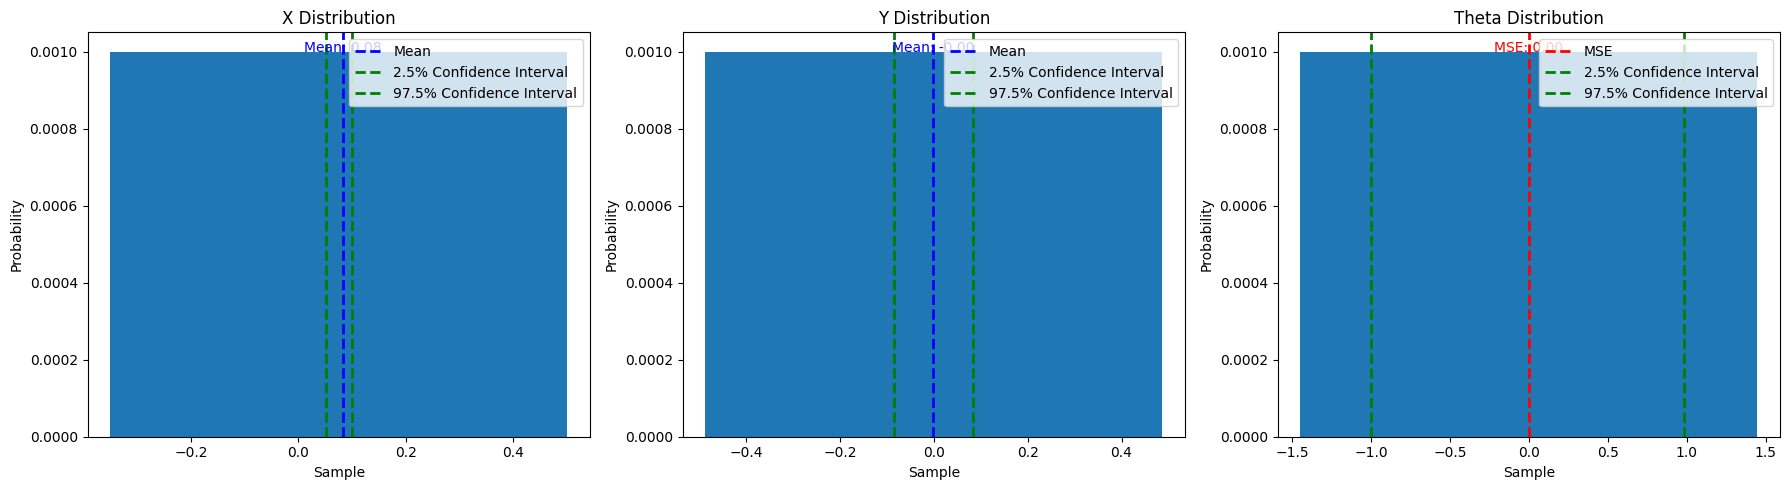

MSE :  0.000099000000000000929162129181815288347934256307780742645263671875
[-2.31795326173, -3.49317435173, -2.31795326173, -2.31795326173, -3.49317435173]
[0.09898513 0.0512561  0.09898513 0.09898513 0.0512561 ]
[ 0.01421068 -0.08586508  0.01421068  0.01421068 -0.08586508]


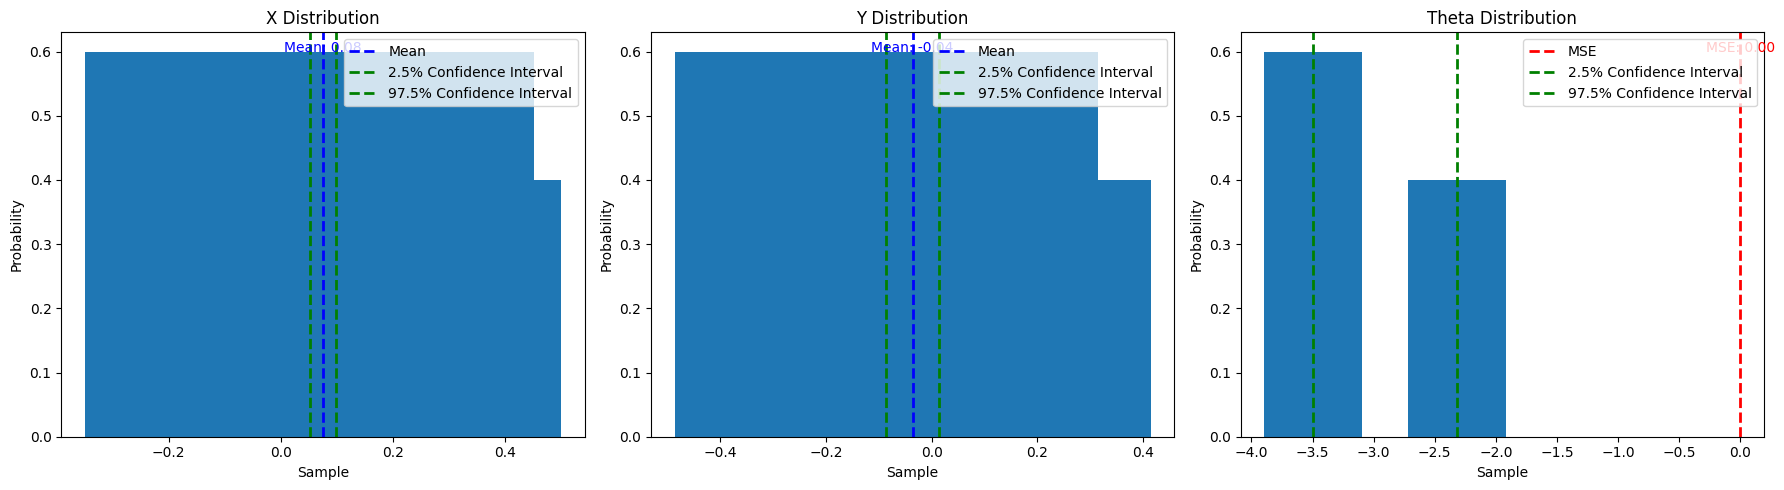

No. of iterations took place in order to reduce the MSE to the given threshold value is : 
 9


In [6]:
# Initial conditions
x_prev = [np.full(n_samples, 0)]
y_prev = [np.full(n_samples, 0)]
theta_prev = [np.full(n_samples, 0)]
# Speed of the vehicle
v = 1
# Time step
delta_t = 0.1
# Number of steps
n_steps = 100
# Number of samples for the distribution
n_samples = 10

# Lists to store the results
x_positions = [x_prev]
y_positions = [y_prev]
theta_values = [theta_prev]

# --------------------------------Initial Conditions Started----------------------------------------
# Accessing initial sample of change in heading angle from delta_theta_uniform_initial.txt.
observed_samples = []
with open('delta_theta_uniform_initial.txt', 'r') as file:
    for line in file:
        num_strings = line.strip().split()
        nums = [round(float(num), 25) for num in num_strings]
        observed_samples.extend(nums)

# Dictionary containing description of various types of distributions.
# distributions = {
#     'Uniform': lambda: random.randint(-np.pi/3, np.pi/3),   # Uniform distribution
#     'Gaussian': lambda: round(np.random.normal(0, 1), 1),  # Gaussian Distribution
#     'Exponential': lambda: round(np.random.exponential(scale=1.0), 1),
#     'Binomial': lambda: np.random.binomial(n=10, p=0.5), #...
#     'Poisson': lambda: np.random.poisson(lam=3),         #...
#     'Beta': lambda: round(np.random.beta(a=2.0, b=5.0), 1), #...
#     'Gamma': lambda: round(np.random.gamma(shape=2.0, scale=1.0), 1),
#     'Log-Normal': lambda: round(np.random.lognormal(mean=0, sigma=1), 1),
#     'Triangular': lambda: round(np.random.triangular(left=-10, mode=0, right=10), 1),  # Triangular distribution
#     'Chi-Square': lambda: round(np.random.chisquare(df=2), 1),  # Chi-square distribution
#     'Pareto': lambda: round(np.random.pareto(a=2), 1)   # Pareto distributio
# }

# # Dictionary containing samples from various types of distributions.
# samples = {name: [dist_func() for _ in range(1000)] for name, dist_func in distributions.items()}

# observed_samples = samples["Triangular"]


mean_observed_samples, std_observed_samples = staticalMeasures (observed_samples)
print ("Observed Samples : \n{}".format(observed_samples))
print ("Observed Mean : {}, Observed Std. Deviation : {}".format(round(mean_observed_samples,2), round(std_observed_samples,2)))

# Finding the underline distribution of observed_samples
dict_observed_samples = generateProbDictionary(observed_samples)
print ("Given Information <PARENT DISTRIBUTION>\n{}".format(dict_observed_samples))
print("The dictionary shows the sampled distribution of items along with the probability assigned to it.")

# --------------------------------Initial Conditions Ended-------------------------------------------

change_in_theta_distrib =  observed_samples
theta_prev, x_prev, y_prev = theta_prev[0], x_prev[0], y_prev[0]

# Doing the 1st iteration (hardcoding), so that MSE can be compared.
theta_final = [round(i + statistics.mean(theta_prev), 25) for i in change_in_theta_distrib]
x_new_distr, y_new_distr = kinematic_bicycle_model(statistics.mean(x_prev), statistics.mean(y_prev), change_in_theta_distrib)

new_samples = returnBootstrapSample(generateProbDictionary(change_in_theta_distrib), 10)

dict_new_samples = generateProbDictionary(new_samples)
MSE = calculateMSE(generateProbDictionary(change_in_theta_distrib), dict_new_samples)
print("MSE :", MSE)
print(theta_final[:5])
print(x_new_distr[:5])
print(y_new_distr[:5])
plot_three_distributions(generateProbDictionary(x_new_distr), generateProbDictionary(y_new_distr), generateProbDictionary(theta_final), MSE, confidence_level=95)


# Updating the parameters.
change_in_theta_distrib = new_samples
theta_prev = theta_final
x_prev = x_new_distr
y_prev = y_new_distr


count = 1
# Set a reference MSE.
while (True):
    if (MSE <= 0.00000102) :
        # Set a threshold value of MSE.
        break

    theta_final = [round(i + statistics.mean(theta_prev), 25) for i in change_in_theta_distrib]
    x_new_distr, y_new_distr = kinematic_bicycle_model(statistics.mean(x_prev), statistics.mean(y_prev), change_in_theta_distrib)

    # Modify change_in_theta_distrib, hence bootstraping the new list of sample from the found distribution; and then making a new distribution.
    new_samples = returnBootstrapSample(generateProbDictionary(change_in_theta_distrib), 10)
    dict_new_samples = generateProbDictionary(new_samples)
    new_MSE = calculateMSE(generateProbDictionary(change_in_theta_distrib), dict_new_samples)
    if (new_MSE < MSE) :
        print("MSE : ", MSE)
        print(theta_final[:5])
        print(x_new_distr[:5])
        print(y_new_distr[:5])
        plot_three_distributions(generateProbDictionary(x_new_distr), generateProbDictionary(y_new_distr), generateProbDictionary(theta_final), MSE, confidence_level=95)
        MSE = new_MSE
    # Modify change_in_theta_distrib
    change_in_theta_distrib = new_samples

    # Updating x_prev and y_prev, so that it can be used as the input for the next iteration :
    theta_prev = theta_final
    # print ("Check5")
    # print (theta_prev)
    x_prev = x_new_distr
    y_prev = y_new_distr
    count+=1
print("No. of iterations took place in order to reduce the MSE to the given threshold value is : \n", count)

In [ ]:
print(count)

526
